In [23]:
import pandas as pd

from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.metrics import classification_report

import pylab as plt

import numpy as np

In [2]:
!echo %cd%

C:\Users\Felipe\Documents\GitHub\pythonstat\ex_classificador


In [3]:
dados = pd.read_csv("adult.csv")

In [5]:
dados.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [6]:
enc = lambda x: preprocessing.LabelEncoder().fit(x).transform(x)

In [11]:
dadosD = dados.copy()

dadosD.drop(columns=['education', 'income'], inplace=True)

for col in ['workclass','marital-status','occupation','relationship','race','gender','native-country']:
    dadosD[col] = enc(dados[col])


In [12]:
dadosD.head(5)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,226802,7,4,7,3,2,1,0,0,40,39
1,38,4,89814,9,2,5,0,4,1,0,0,50,39
2,28,2,336951,12,2,11,0,4,1,0,0,40,39
3,44,4,160323,10,2,7,0,2,1,7688,0,40,39
4,18,0,103497,10,4,0,3,4,0,0,0,30,39


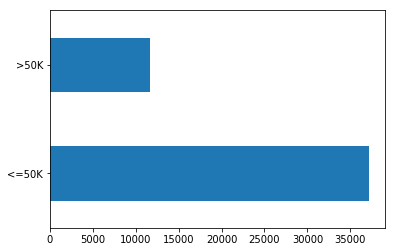

In [42]:
dados.income.value_counts().plot.barh();

In [13]:
scan = DBSCAN(eps=1.5, min_samples=2,  metric='manhattan')

In [99]:
#scan.fit(dadosD)

In [14]:
res = scan.fit_predict(dadosD)

In [17]:
pd.Series(res).value_counts().head(5)

-1     48567
 65        3
 76        3
 68        3
 94        3
dtype: int64

In [19]:
def ruideiro(x):
    res = DBSCAN(eps=x, min_samples=2,  metric='manhattan').fit_predict(dadosD)
    return pd.Series(res).value_counts().values[0]

In [35]:
rui = np.vectorize(ruideiro) # testa varios eps e visualiza a quantidade de deteccoes do primeiro grupo
eps_x = np.arange(1,50,2)
eps_t = rui(eps_x)

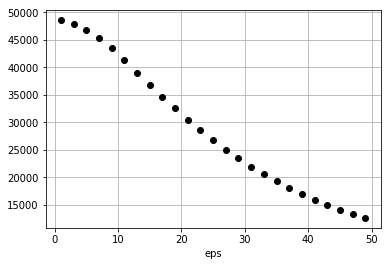

In [37]:
plt.plot(eps_x,eps_t,"ok"); plt.xlabel('eps');plt.grid()

In [43]:
res2 = DBSCAN(eps=50, min_samples=2,  metric='manhattan').fit_predict(dadosD)

pd.Series(res2).value_counts().head(5)

-1      12244
 54       314
 261      301
 49       199
 311      161
dtype: int64

K - means:

In [44]:
kmedias = KMeans(n_clusters=2)

In [45]:
res = kmedias.fit_predict(dadosD)

In [48]:
somaAcertos = ((dados.income != "<=50K") == pd.Series(res)).sum()

In [49]:
somaAcertos/float(pd.Series(res).count())

0.6194873264813071

In [51]:
print classification_report((dados.income != "<=50K"),pd.Series(res))

              precision    recall  f1-score   support

       False       0.76      0.74      0.75     37155
        True       0.23      0.25      0.24     11687

   micro avg       0.62      0.62      0.62     48842
   macro avg       0.49      0.49      0.49     48842
weighted avg       0.63      0.62      0.62     48842

